<a href="https://colab.research.google.com/github/MarkMulehi22/Optimal-Asset-Allocation-for-Pension-funds-using-Post-Modern-portfolio-Theory/blob/main/PMPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import pandas as pd
df = pd.read_csv('StockData.csv')
df

,Date,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
0,3/11/2024,415.00,8.92,13.75,120.00,5.68,20.90,21.40,185.0,40.00,39.00
1,3/8/2024,414.75,8.78,13.50,119.75,6.02,19.45,20.20,189.0,40.05,37.95
2,3/7/2024,412.25,8.68,13.50,120.50,6.34,19.50,20.20,185.0,40.05,36.50
3,3/6/2024,415.00,8.56,13.50,123.75,6.32,20.20,20.80,185.0,40.00,38.70
4,3/5/2024,415.00,8.70,13.25,115.00,6.60,19.50,20.40,180.0,40.45,36.50
...,...,...,...,...,...,...,...,...,...,...,...
1534,1/8/2018,NaN,44.25,28.25,NaN,NaN,NaN,104.55,NaN,41.50,NaN
1535,1/5/2018,NaN,44.25,27.75,NaN,NaN,NaN,104.55,NaN,41.75,NaN
1536,1/4/2018,NaN,44.25,27.75,NaN,NaN,NaN,105.45,NaN,41.00,NaN
1537,1/3/2018,NaN,44.25,28.00,NaN,NaN,NaN,105.45,NaN,40.75,NaN


In [ ]:
df.describe()

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
count,1304.000000,1538.000000,1539.000000,1290.000000,1466.000000,1371.000000,1539.000000,1161.000000,1539.000000,964.000000
mean,466.579371,20.627237,28.208609,96.068023,7.560048,20.343144,33.739812,310.430879,42.799415,39.213641
std,92.805725,10.804580,7.668670,11.213471,1.814580,3.409973,24.886018,103.083347,5.930602,9.170390
min,309.500000,7.900000,11.650000,73.500000,5.000000,14.150000,9.040000,148.250000,28.100000,19.650000
25%,420.000000,9.520000,24.250000,88.500000,6.140000,17.950000,17.165000,237.500000,37.900000,32.215000
50%,448.000000,17.250000,28.250000,95.000000,6.780000,19.900000,20.150000,280.250000,42.000000,39.015000
75%,491.000000,29.250000,31.875000,104.500000,8.980000,22.000000,43.590000,370.000000,48.150000,50.050000
max,800.000000,47.500000,44.950000,129.750000,12.400000,31.400000,105.450000,535.000000,56.000000,55.080000


In [ ]:
Date = df['Date']


In [ ]:
# Step 1: Handling Missing Values
# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Step 2: Standardizing Column Names
# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Rename columns to remove leading/trailing whitespaces
df.rename(columns={'BAT': 'BAT', 'Centum': 'Centum', 'Saf': 'Saf', 'Stanbic': 'Stanbic', 'Stanlib': 'Stanlib','Sasini': 'Sasini', 'NMG': 'NMG', 'Jubilee': 'Jubilee', 'Equity': 'Equity', 'Crown': 'Crown'}, inplace=True)

# If there are still missing values, you can choose to drop them
# df.dropna(inplace=True)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

<ipython-input-5-c3e95037ae27>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df = df.copy()
df.isna().sum()
df

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
Date,,,,,,,,,,
2024-03-11,415.000000,8.920000,13.75,120.000000,5.680000,20.900000,21.40,185.000000,40.00,39.000000
2024-03-08,414.750000,8.780000,13.50,119.750000,6.020000,19.450000,20.20,189.000000,40.05,37.950000
2024-03-07,412.250000,8.680000,13.50,120.500000,6.340000,19.500000,20.20,185.000000,40.05,36.500000
2024-03-06,415.000000,8.560000,13.50,123.750000,6.320000,20.200000,20.80,185.000000,40.00,38.700000
2024-03-05,415.000000,8.700000,13.25,115.000000,6.600000,19.500000,20.40,180.000000,40.45,36.500000
...,...,...,...,...,...,...,...,...,...,...
2018-01-08,466.579371,44.250000,28.25,96.068023,7.560048,20.343144,104.55,310.430879,41.50,39.213641
2018-01-05,466.579371,44.250000,27.75,96.068023,7.560048,20.343144,104.55,310.430879,41.75,39.213641
2018-01-04,466.579371,44.250000,27.75,96.068023,7.560048,20.343144,105.45,310.430879,41.00,39.213641


In [ ]:
df.describe()

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,466.579371,20.627237,28.208609,96.068023,7.560048,20.343144,33.739812,310.430879,42.799415,39.213641
std,85.421817,10.801067,7.668670,10.265695,1.770992,3.218348,24.886018,89.523971,5.930602,7.256426
min,309.500000,7.900000,11.650000,73.500000,5.000000,14.150000,9.040000,148.250000,28.100000,19.650000
25%,425.000000,9.520000,24.250000,90.375000,6.140000,18.050000,17.165000,255.625000,37.900000,36.500000
50%,460.250000,17.250000,28.250000,96.068023,6.900000,20.100000,20.150000,310.430879,42.000000,39.213641
75%,485.000000,29.250000,31.875000,101.625000,8.900000,21.525000,43.590000,351.000000,48.150000,41.000000
max,800.000000,47.500000,44.950000,129.750000,12.400000,31.400000,105.450000,535.000000,56.000000,55.080000


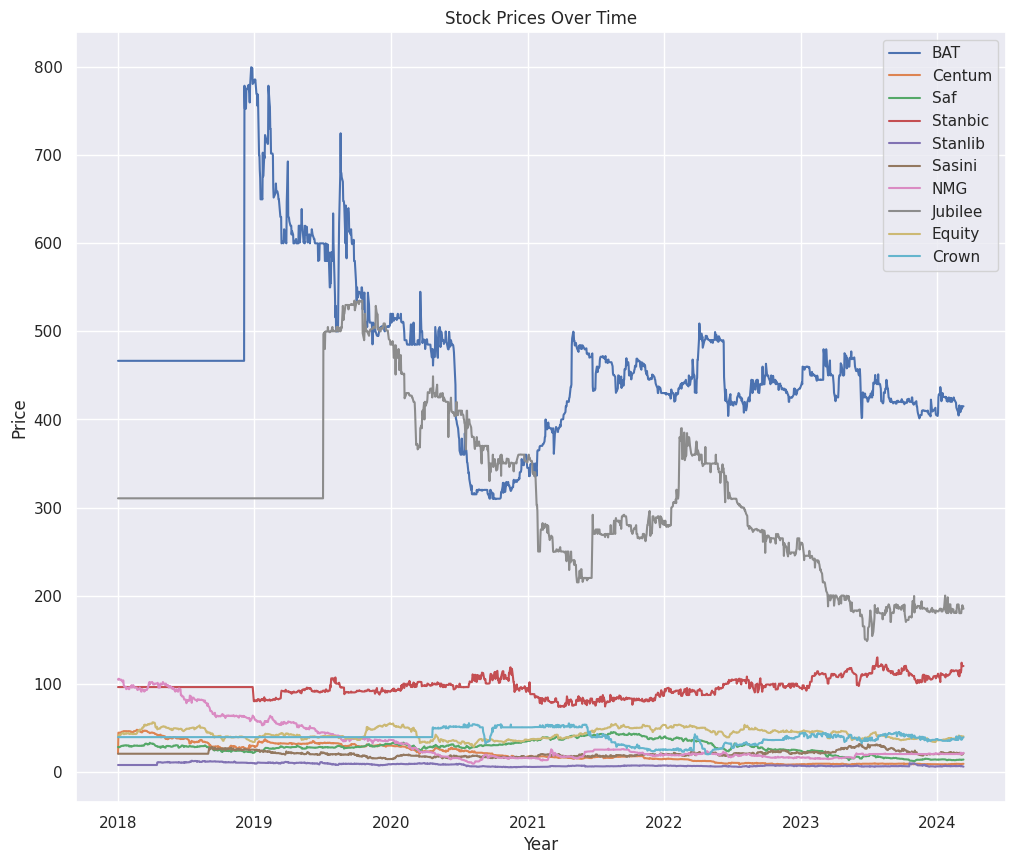

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate skewness and kurtosis for each column (stock)
skewness = df.skew()
kurtosis = df.kurtosis()

# Print the results
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
BAT        1.215070
Centum     0.574636
Saf       -0.104111
Stanbic    0.226074
Stanlib    0.766488
Sasini     0.942747
NMG        1.458885
Jubilee    0.622492
Equity     0.148857
Crown     -0.087943
dtype: float64

Kurtosis:
BAT        2.547410
Centum    -0.712172
Saf       -0.323418
Stanbic   -0.251946
Stanlib   -0.594338
Sasini     0.935476
NMG        0.932338
Jubilee    0.094604
Equity    -1.092257
Crown      0.097225
dtype: float64


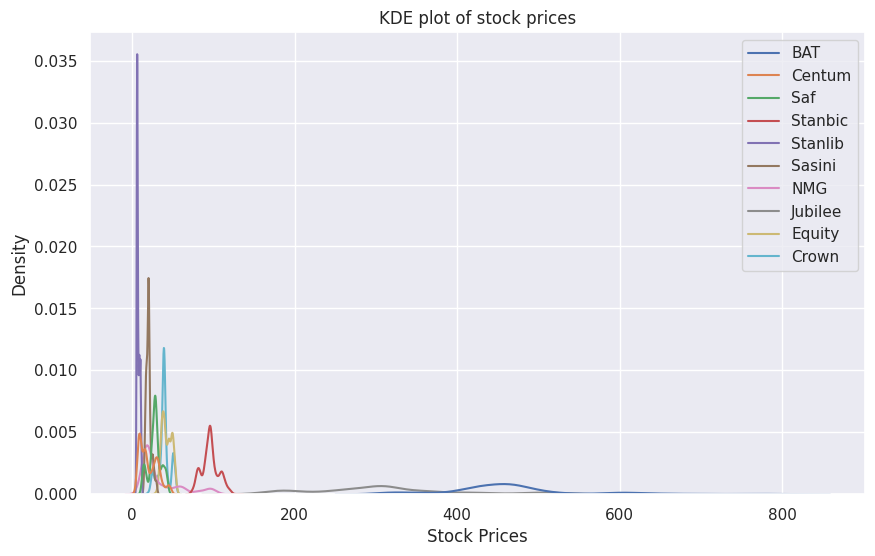

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(10, 6))

# Assuming df contains your data
sns.kdeplot(df)

plt.title("KDE plot of stock prices")
plt.xlabel("Stock Prices")
plt.show()

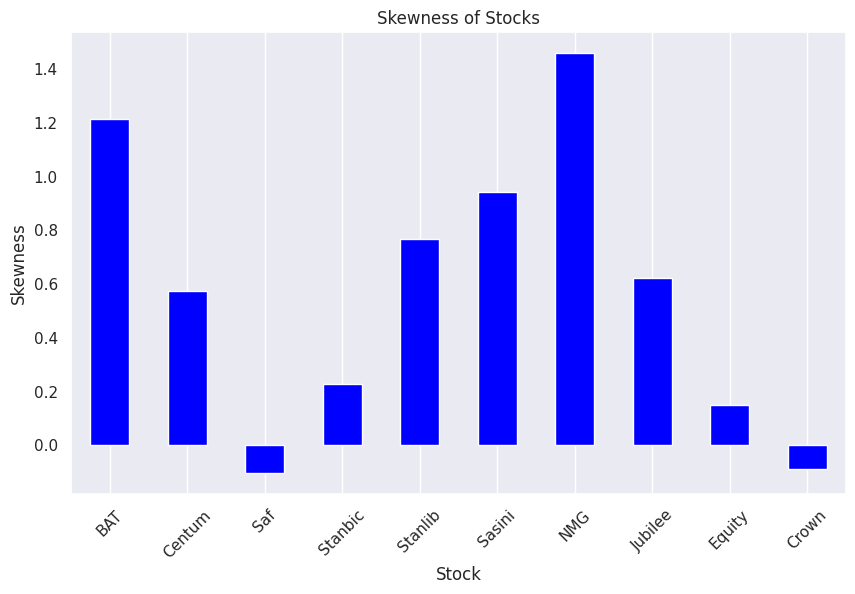

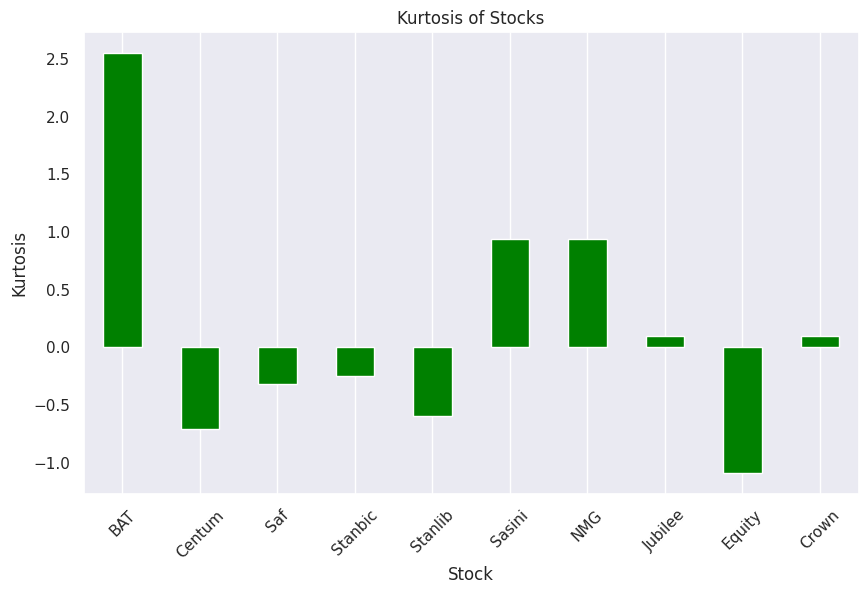

In [ ]:
import matplotlib.pyplot as plt

# Plot skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='blue')
plt.title('Skewness of Stocks')
plt.xlabel('Stock')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot kurtosis
plt.figure(figsize=(10, 6))
kurtosis.plot(kind='bar', color='green')
plt.title('Kurtosis of Stocks')
plt.xlabel('Stock')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
daily_return = np.log(df.pct_change() + 1).dropna()
#Here I am calculating log daily returns and removing the first empty column of each stock

#Now calculating mean of those daily return
daily_return_mean = np.array(daily_return.mean())

#Now assigning weights
#Since there are ten stocks so each will have a weight of 0.2 (1/12)
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [ ]:
daily_return

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
Date,,,,,,,,,,
2024-03-08,-0.000603,-0.015820,-0.018349,-0.002086,0.058136,-0.071902,-0.057708,0.021391,0.001249,-0.027292
2024-03-07,-0.006046,-0.011455,0.000000,0.006244,0.051792,0.002567,0.000000,-0.021391,0.000000,-0.038957
2024-03-06,0.006649,-0.013921,0.000000,0.026614,-0.003160,0.035268,0.029270,0.000000,-0.001249,0.058527
2024-03-05,0.000000,0.016223,-0.018692,-0.073331,0.043350,-0.035268,-0.019418,-0.027399,0.011187,-0.058527
2024-03-04,-0.014563,-0.004608,0.018692,-0.021979,-0.088666,0.025318,0.057158,0.000000,-0.011187,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-01-08,0.000000,0.005666,-0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011976,0.000000
2018-01-05,0.000000,0.000000,-0.017858,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006,0.000000
2018-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008571,0.000000,-0.018127,0.000000


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(daily_return)
print(f"Shapiro-Wilk Test: Test Statistic = {shapiro_test_statistic}, p-value = {shapiro_p_value}")

# Jarque-Bera Test
jarque_bera_test_statistic, jarque_bera_p_value = stats.jarque_bera(daily_return)
print(f"Jarque-Bera Test: Test Statistic = {jarque_bera_test_statistic}, p-value = {jarque_bera_p_value}")


Shapiro-Wilk Test: Test Statistic = 0.7707399129867554, p-value = 0.0
Jarque-Bera Test: Test Statistic = 4462468.174232707, p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import math
mean = daily_return.mean()*252
table1 = pd.DataFrame()
table1["Annualized Returns"] = mean

std = daily_return.std()*math.sqrt(252)
table2 = pd.DataFrame()
table2["Annualized Volatility"] = std

table = pd.concat([table1, table2], axis=1, join='inner')
table

,Annualized Returns,Annualized Volatility
BAT,1.919487e-02,0.344452
Centum,1.373574e-01,0.453791
Saf,1.165239e-01,0.279184
Stanbic,-3.644582e-02,0.383185
Stanlib,4.684878e-02,0.544098
Sasini,-4.424783e-03,0.504094
NMG,2.599097e-01,0.411671
Jubilee,8.480921e-02,0.372254
Equity,-4.843330e-16,0.260847
Crown,8.951123e-04,0.488088


In [ ]:
daily_return.cov()

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
BAT,0.000471,0.000007,8.686743e-06,9.179639e-06,0.000033,-0.000011,0.000007,-4.788580e-06,0.000006,0.000003
Centum,0.000007,0.000817,4.136291e-05,-9.117469e-06,-0.000021,0.000009,0.000003,1.597737e-05,0.000027,-0.000008
Saf,0.000009,0.000041,3.092996e-04,-4.592066e-07,-0.000023,-0.000012,0.000011,2.588815e-06,0.000067,0.000024
Stanbic,0.000009,-0.000009,-4.592066e-07,5.826614e-04,-0.000015,0.000019,0.000013,-2.212962e-07,-0.000001,0.000027
Stanlib,0.000033,-0.000021,-2.338646e-05,-1.474586e-05,0.001175,0.000025,0.000002,-1.307053e-06,-0.000009,0.000023
Sasini,-0.000011,0.000009,-1.186052e-05,1.915015e-05,0.000025,0.001008,-0.000024,2.005269e-05,-0.000017,0.000012
NMG,0.000007,0.000003,1.122978e-05,1.306208e-05,0.000002,-0.000024,0.000673,9.831428e-06,0.000009,-0.000014
Jubilee,-0.000005,0.000016,2.588815e-06,-2.212962e-07,-0.000001,0.000020,0.000010,5.498942e-04,0.000007,0.000012
Equity,0.000006,0.000027,6.739140e-05,-1.134028e-06,-0.000009,-0.000017,0.000009,6.786660e-06,0.000270,0.000005
Crown,0.000003,-0.000008,2.438609e-05,2.730255e-05,0.000023,0.000012,-0.000014,1.228054e-05,0.000005,0.000945


In [ ]:
daily_return.corr()

,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
BAT,1.000000,0.011657,0.022764,0.017526,0.043809,-0.015255,0.012733,-0.009411,0.018011,0.004544
Centum,0.011657,1.000000,0.082275,-0.013213,-0.021310,0.010034,0.004543,0.023835,0.057835,-0.008893
Saf,0.022764,0.082275,1.000000,-0.001082,-0.038797,-0.021237,0.024622,0.006277,0.233201,0.045098
Stanbic,0.017526,-0.013213,-0.001082,1.000000,-0.017823,0.024983,0.020867,-0.000391,-0.002859,0.036787
Stanlib,0.043809,-0.021310,-0.038797,-0.017823,1.000000,0.023086,0.002305,-0.001626,-0.016053,0.022030
Sasini,-0.015255,0.010034,-0.021237,0.024983,0.023086,1.000000,-0.029102,0.026929,-0.033443,0.012423
NMG,0.012733,0.004543,0.024622,0.020867,0.002305,-0.029102,1.000000,0.016167,0.021213,-0.017253
Jubilee,-0.009411,0.023835,0.006277,-0.000391,-0.001626,0.026929,0.016167,1.000000,0.017613,0.017033
Equity,0.018011,0.057835,0.233201,-0.002859,-0.016053,-0.033443,0.021213,0.017613,1.000000,0.010848
Crown,0.004544,-0.008893,0.045098,0.036787,0.022030,0.012423,-0.017253,0.017033,0.010848,1.000000


In [ ]:
daily_return_mean

array([ 7.61701089e-05,  5.45069197e-04,  4.62396415e-04, -1.44626285e-04,
        1.85907850e-04, -1.75586627e-05,  1.03138784e-03,  3.36544498e-04,
       -1.92195631e-18,  3.55203305e-06])

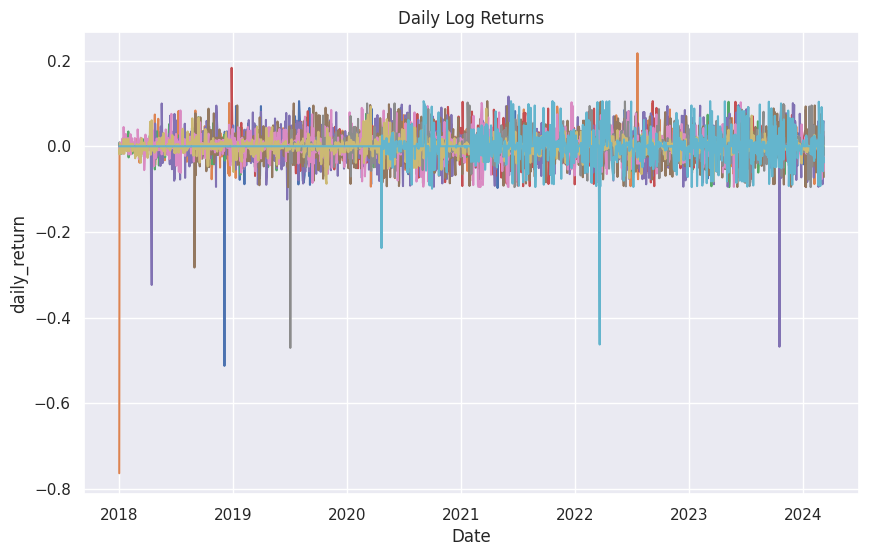

In [ ]:
# Plot the daily returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_return.index, daily_return, linestyle='-')
plt.title('Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('daily_return')
plt.grid(True)
plt.show()

In [ ]:
#Calculating Portfolio Return
Port_return = np.sum(weights * daily_return_mean)

print('The Annual Return of Portfolio is {}%'.format((Port_return * 252)*100))
#Here 252 is multiplied for annual calculation i.e. 252 trading days in a year

The Annual Return of Portfolio is 6.246684353917272%


In [ ]:
#Calculating Portfolio Volatility
cov = daily_return.cov()
Port_Vol = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))
Port_Vol

print('The Annual Volatility of Portfolio is {}%'.format((Port_Vol * np.sqrt(252))*100))

The Annual Volatility of Portfolio is 13.641692631806132%


In [ ]:
import numpy as np
import pandas as pd

# Assume you have daily_return_mean, cov, and daily_return already defined

# Declare the number of Portfolio to be generated
num_portfolio = 3000

# Set the risk-free rate
risk_free_rate = 0.106  # For example, 10.6%

# Creating an empty list for storing returns, volatility, sharpe_ratio, and weightage of each stock in the portfolio
results = np.zeros((3 + len(daily_return.columns), num_portfolio))

# Monte Carlo Simulation
for i in range(num_portfolio):
    weight = np.random.rand(len(daily_return.columns))  # Declaring random weights
    weight = weight / np.sum(weight)  # Ensuring sum of all weights equals 1

    p_annual_return = np.sum(weight * daily_return_mean) * 252  # Annualized Return
    p_annual_volatility = np.sqrt(np.dot(weight.T, np.dot(cov, weight))) * np.sqrt(252)  # Annualized Volatility

    # Sharpe Ratio
    excess_return = p_annual_return - risk_free_rate
    sharpe_ratio = excess_return / p_annual_volatility

    # Storing the values in results list
    results[0, i] = p_annual_return
    results[1, i] = p_annual_volatility
    results[2, i] = sharpe_ratio

    for j in range(len(weight)):
        results[j + 3, i] = weight[j]

# Making a DataFrame for results list of all generated Portfolios
cols = ['Ann_Ret', 'Ann_Vol', 'Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

result_df = pd.DataFrame(results.T, columns=cols)


In [ ]:
#Visulising the result dataframe
result_df

,Ann_Ret,Ann_Vol,Sharpe_Ratio,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
0,0.063249,0.143415,-0.298094,0.096376,0.014815,0.097148,0.126522,0.074191,0.153438,0.148250,0.133450,0.145999,0.009811
1,0.079970,0.150659,-0.172775,0.154082,0.175247,0.127308,0.046044,0.098979,0.111233,0.136880,0.000421,0.119158,0.030648
2,0.050988,0.141406,-0.389037,0.092279,0.116730,0.085318,0.120095,0.098258,0.113651,0.072828,0.052840,0.127434,0.120567
3,0.075372,0.170612,-0.179521,0.002890,0.152392,0.182391,0.064206,0.176729,0.181322,0.076681,0.095026,0.063150,0.005213
4,0.039821,0.136820,-0.483698,0.155762,0.004000,0.136175,0.111627,0.075361,0.136212,0.051265,0.096332,0.166253,0.067013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.047761,0.166987,-0.348763,0.063158,0.173581,0.070560,0.015672,0.095815,0.154184,0.034253,0.025758,0.186240,0.180780
2996,0.053449,0.139319,-0.377202,0.135461,0.065631,0.142689,0.049424,0.114961,0.130890,0.049971,0.107832,0.126475,0.076666
2997,0.072234,0.181654,-0.185881,0.023540,0.083719,0.062081,0.095826,0.199947,0.044640,0.163819,0.054223,0.054737,0.217468
2998,0.013270,0.170277,-0.544579,0.044839,0.021951,0.020441,0.199581,0.085584,0.122943,0.000511,0.123753,0.164621,0.215777


In [ ]:
#locating
#Portfolio 1 - Sharpe ratio is the highest (Return/Volatility)
#Portfolio 2 - Volatility is the lowest


#Portfolio 1
max_sharpe_ratio = result_df.iloc[result_df['Sharpe_Ratio'].idxmax()]

#Portfolio 2
volatility_lowest = result_df.iloc[result_df['Ann_Vol'].idxmin()]

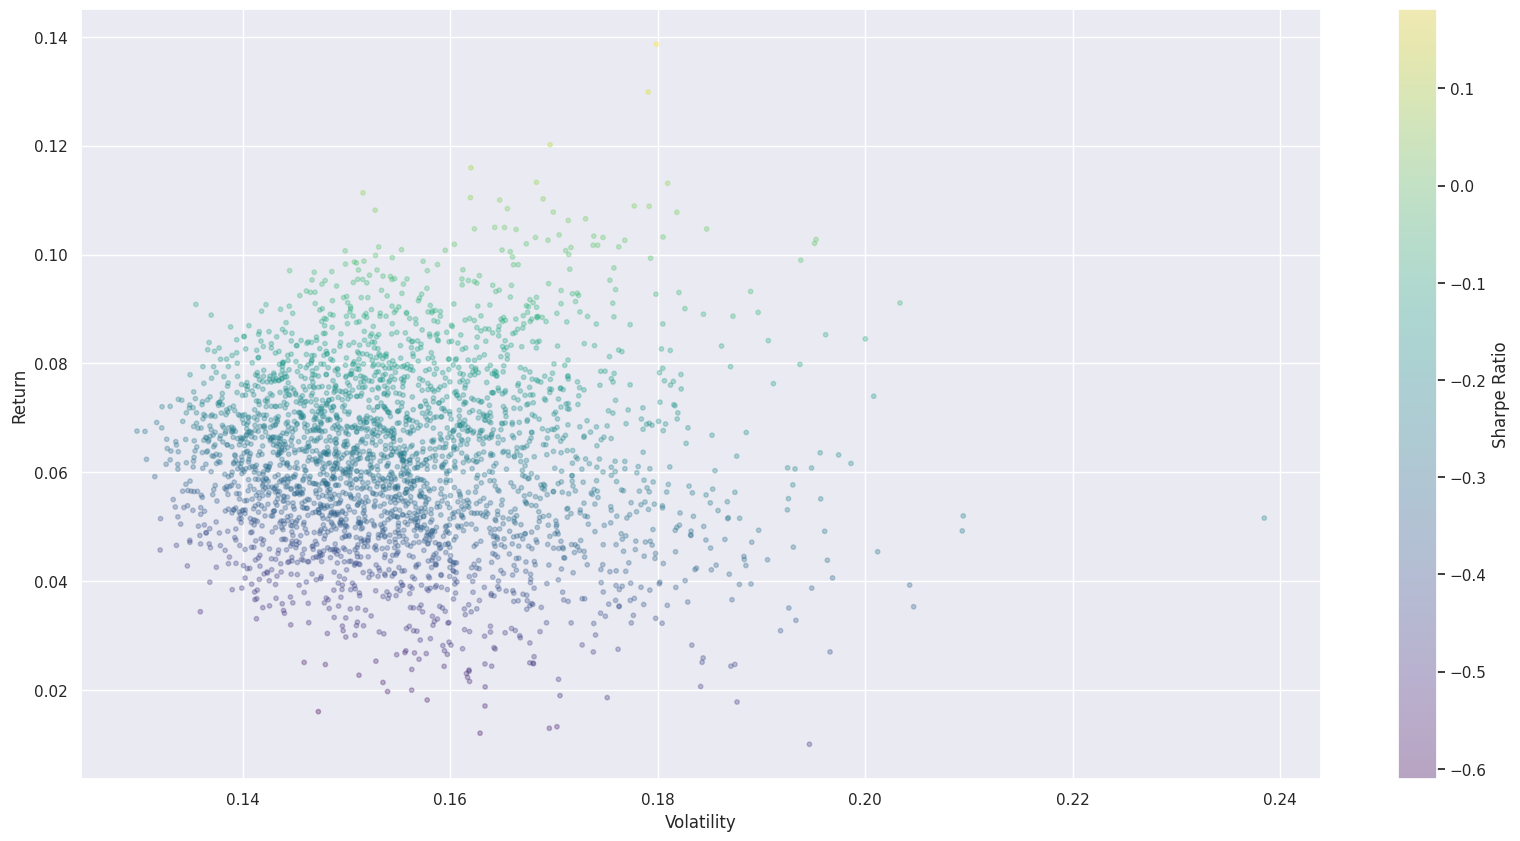

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(result_df['Ann_Vol'], result_df['Ann_Ret'], c=result_df['Sharpe_Ratio'], cmap='viridis', marker='o', alpha=0.3, s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

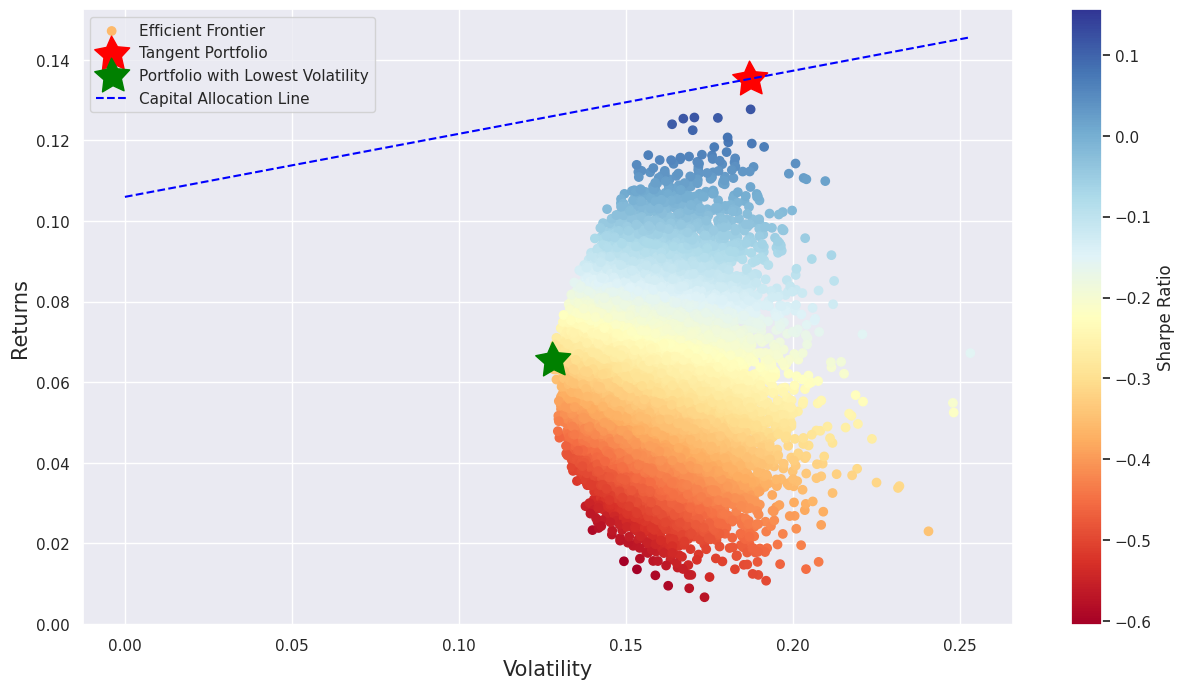

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the efficient frontier and tangent portfolio line
plt.figure(figsize=(15, 8))

# Scatter plot for the efficient frontier
plt.scatter(result_df['Ann_Vol'], result_df['Ann_Ret'], c=result_df['Sharpe_Ratio'], cmap='RdYlBu', label='Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')

# Plot the tangent portfolio
plt.scatter(max_sharpe_ratio[1], max_sharpe_ratio[0], marker=(5, 1, 3), color='red', s=700, label='Tangent Portfolio')

# Plot the portfolio with lowest volatility
plt.scatter(volatility_lowest[1], volatility_lowest[0], marker=(5, 1, 3), color='green', s=700, label='Portfolio with Lowest Volatility')

# Compute and plot the capital allocation line
max_volatility = result_df['Ann_Vol'].max()
plt.plot([0, max_volatility], [risk_free_rate, max_volatility * max_sharpe_ratio[2] + risk_free_rate], color='blue', linestyle='--', label='Capital Allocation Line')

plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Returns', fontsize=15)
plt.legend()
plt.show()


In [ ]:
print('The Portfolio with maximum Return(or Sharpe_Ratio) is:')
print('All values in percentage')
print(round(max_sharpe_ratio * 100,2))

The Portfolio with maximum Return(or Sharpe_Ratio) is:
All values in percentage
Ann_Ret         16.08
Ann_Vol         20.99
Sharpe_Ratio    26.13
BAT              1.62
Centum          14.91
Saf             26.88
Stanbic          7.24
Stanlib          0.59
Sasini           0.97
NMG             42.60
Jubilee          0.45
Equity           1.01
Crown            3.74
Name: 11163, dtype: float64


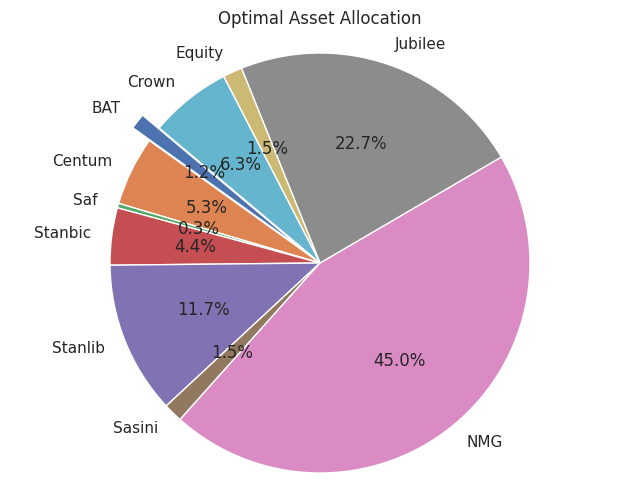

In [ ]:
import matplotlib.pyplot as plt

# Stock names and their respective percentages
stocks = ['BAT', 'Centum', 'Saf', 'Stanbic', 'Stanlib', 'Sasini', 'NMG', 'Jubilee', 'Equity', 'Crown']
percentages = [1.21, 5.32, 0.35, 4.40, 11.75, 1.47, 45.03, 22.68, 1.49, 6.30]

# Explode the stock with the largest percentage
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(percentages, explode=explode, labels=stocks, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Optimal Asset Allocation')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assume you have daily_return_mean, cov, and daily_return already defined

# Declare the number of Portfolio to be generated
num_portfolio = 30000

# Set the risk-free rate
risk_free_rate = 0.106  # For example, 10.6%

# Creating an empty list for storing returns, volatility, sharpe_ratio, and weightage of each stock in the portfolio
results = np.zeros((3 + len(daily_return.columns), num_portfolio))

# Monte Carlo Simulation
for i in range(num_portfolio):
    weight = np.random.rand(len(daily_return.columns))  # Declaring random weights
    weight = weight / np.sum(weight)  # Ensuring sum of all weights equals 1

    p_annual_return = np.sum(weight * daily_return_mean) * 252  # Annualized Return
    p_annual_volatility = np.sqrt(np.dot(weight.T, np.dot(cov, weight))) * np.sqrt(252)  # Annualized Volatility

    # Sharpe Ratio
    excess_return = p_annual_return - risk_free_rate
    sharpe_ratio = excess_return / p_annual_volatility

    # Storing the values in results list
    results[0, i] = p_annual_return
    results[1, i] = p_annual_volatility
    results[2, i] = sharpe_ratio

    for j in range(len(weight)):
        results[j + 3, i] = weight[j]

# Making a DataFrame for results list of all generated Portfolios
cols = ['Ann_Ret', 'Ann_Vol', 'Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

result_df = pd.DataFrame(results.T, columns=cols)

In [ ]:
import numpy as np

# Historical returns of stocks (in percent)
stock_returns = {
    'BAT': 1.78,
    'Centum': 2.46,
    'Safaricom': 0.33,
    'Stanbic': 0.39,
    'Stanlib': 0.29,
    'Sasini': 0.49,
    'NMG': 4.73,
    'Jubilee': 0.95,
    'Equity': 0.41,
    'Crown': 1.69
}

# Historical risk-free rate (in percent)
risk_free_rate = 0.106  # Example risk-free rate

# Convert historical returns to numpy array
returns_array = np.array(list(stock_returns.values()))

# Calculate excess returns
excess_returns = returns_array - risk_free_rate

# Calculate the Sharpe ratio for each stock
sharpe_ratios = excess_returns / np.std(excess_returns)

# Estimate expected returns using Sharpe ratio
expected_returns = risk_free_rate + (sharpe_ratios * np.std(excess_returns))

# Print the results
for stock, expected_return in zip(stock_returns.keys(), expected_returns):
    print(f'{stock}: {expected_return:.2f}%')


BAT: 1.78%
Centum: 2.46%
Safaricom: 0.33%
Stanbic: 0.39%
Stanlib: 0.29%
Sasini: 0.49%
NMG: 4.73%
Jubilee: 0.95%
Equity: 0.41%
Crown: 1.69%


In [ ]:
import numpy as np
import pandas as pd

# Assume you have daily_return_mean, cov, and daily_return already defined

# Declare the number of Portfolio to be generated
num_portfolio = 30000

# Set the risk-free rate
risk_free_rate = 0.106  # For example, 10.6%

# Creating an empty list for storing returns, volatility, sortino_ratio, and weightage of each stock in the portfolio
results = np.zeros((3 + len(daily_return.columns), num_portfolio))

# Monte Carlo Simulation
for i in range(num_portfolio):
    weight = np.random.rand(len(daily_return.columns))  # Declaring random weights
    weight = weight / np.sum(weight)  # Ensuring sum of all weights equals 1

    p_annual_return = np.sum(weight * daily_return_mean) * 252  # Annualized Return
    p_annual_volatility = np.sqrt(np.dot(weight.T, np.dot(cov, weight))) * np.sqrt(252)  # Annualized Volatility

    # Sortino Ratio
    downside_returns = np.minimum(0, daily_return_mean - risk_free_rate)
    semi_deviation = np.sqrt(np.mean(np.square(np.minimum(0, downside_returns))))
    sortino_ratio = (p_annual_return - risk_free_rate) / semi_deviation

    # Storing the values in results list
    results[0, i] = p_annual_return
    results[1, i] = p_annual_volatility
    results[2, i] = sortino_ratio

    for j in range(len(weight)):
        results[j + 3, i] = weight[j]

# Making a DataFrame for results list of all generated Portfolios
cols = ['Ann_Ret', 'Ann_Vol', 'Sortino_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

result_df1 = pd.DataFrame(results.T, columns=cols)


In [ ]:
result_df1

,Ann_Ret,Ann_Vol,Sortino_Ratio,BAT,Centum,Saf,Stanbic,Stanlib,Sasini,NMG,Jubilee,Equity,Crown
0,0.059078,0.156427,-0.443693,0.087108,0.117556,0.025831,0.153376,0.008038,0.082681,0.164341,0.011239,0.169717,0.180113
1,0.046443,0.152355,-0.563172,0.047684,0.028503,0.112908,0.141079,0.157164,0.099865,0.060051,0.129138,0.093135,0.130474
2,0.069654,0.153702,-0.343687,0.104780,0.109117,0.093723,0.037325,0.154938,0.103261,0.089660,0.151947,0.040581,0.114670
3,0.042543,0.175499,-0.600050,0.034037,0.016193,0.027658,0.147446,0.166470,0.179698,0.089949,0.133234,0.054910,0.150405
4,0.077778,0.147552,-0.266870,0.173938,0.071959,0.079181,0.187436,0.019118,0.006966,0.195089,0.124646,0.121014,0.020654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.042940,0.145800,-0.596301,0.192510,0.010990,0.191866,0.130485,0.135495,0.002058,0.037140,0.048156,0.186905,0.064396
29996,0.083858,0.157263,-0.209374,0.171626,0.171568,0.147334,0.005040,0.040611,0.099291,0.125140,0.069399,0.014407,0.155582
29997,0.068457,0.160671,-0.355007,0.008580,0.011666,0.166792,0.055552,0.017396,0.100313,0.106654,0.247985,0.110228,0.174834
29998,0.062057,0.141133,-0.415524,0.143910,0.073296,0.152638,0.085798,0.156455,0.053354,0.081068,0.074754,0.106879,0.071849


In [ ]:
#locating
#Portfolio 1 - Sharpe ratio is the highest (Return/Volatility)
#Portfolio 2 - Volatility is the lowest


#Portfolio 1
max_sortino_ratio = result_df1.iloc[result_df1['Sortino_Ratio'].idxmax()]

#Portfolio 2
volatility_lowest = result_df1.iloc[result_df1['Ann_Vol'].idxmin()]

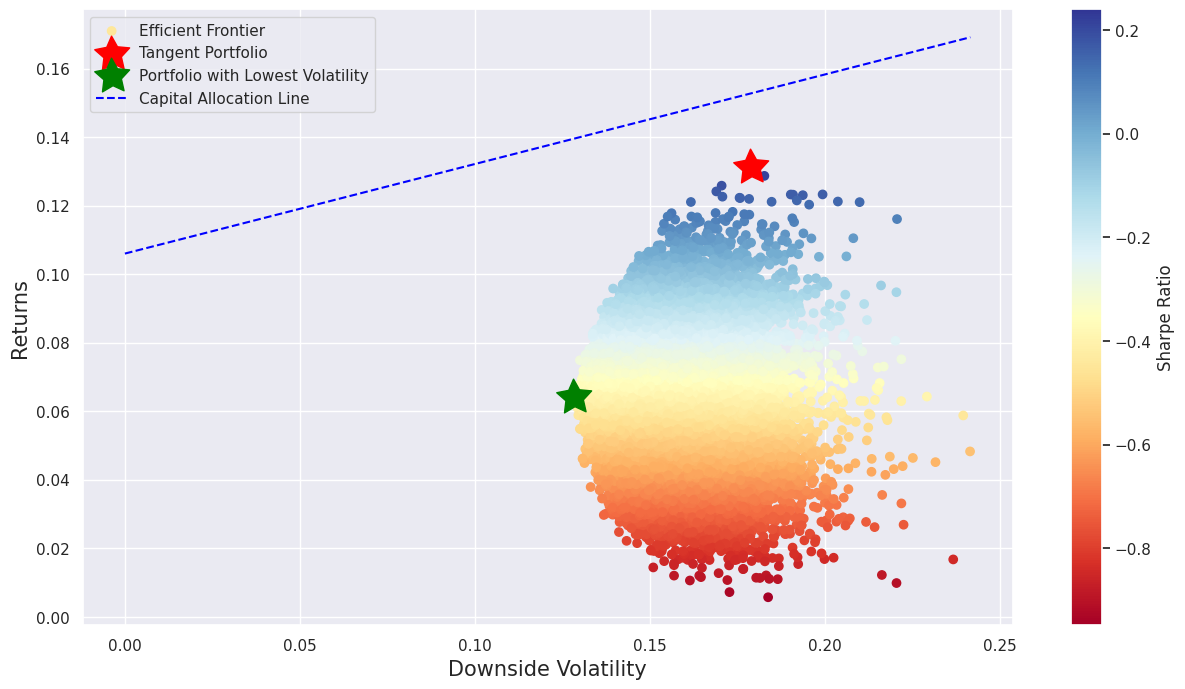

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the efficient frontier and tangent portfolio line
plt.figure(figsize=(15, 8))

# Scatter plot for the efficient frontier
plt.scatter(result_df1['Ann_Vol'], result_df1['Ann_Ret'], c=result_df1['Sortino_Ratio'], cmap='RdYlBu', label='Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')

# Plot the tangent portfolio
plt.scatter(max_sortino_ratio[1], max_sortino_ratio[0], marker=(5, 1, 3), color='red', s=700, label='Tangent Portfolio')

# Plot the portfolio with lowest volatility
plt.scatter(volatility_lowest[1], volatility_lowest[0], marker=(5, 1, 3), color='green', s=700, label='Portfolio with Lowest Volatility')

# Compute and plot the capital allocation line
max_volatility = result_df['Ann_Vol'].max()
plt.plot([0, max_volatility], [risk_free_rate, max_volatility * max_sharpe_ratio[2] + risk_free_rate], color='blue', linestyle='--', label='Capital Allocation Line')

plt.xlabel('Downside Volatility', fontsize=15)
plt.ylabel('Returns', fontsize=15)
plt.legend()
plt.show()

In [ ]:
print('The Portfolio with maximum Return(or Sortino_Ratio) is:')
print('All values in percentage')
print(round(max_sortino_ratio * 100,2))

The Portfolio with maximum Return(or Sortino_Ratio) is:
All values in percentage
Ann_Ret          13.14
Ann_Vol          17.90
Sortino_Ratio    24.00
BAT               7.29
Centum           12.33
Saf              12.32
Stanbic           0.70
Stanlib           2.80
Sasini            2.61
NMG              33.76
Jubilee          11.64
Equity            3.36
Crown            13.18
Name: 16406, dtype: float64


In [ ]:
# Portfolio's expected return
portfolio_expected_return = 0.1343  # 13.43% as a decimal

# Optimal weights of each stock
weights = {
    'BAT': 0.1263,
    'Centum': 0.1831,
    'Saf': 0.0243,
    'Stanbic': 0.0289,
    'Stanlib': 0.0214,
    'Sasini': 0.0363,
    'NMG': 0.3523,
    'Jubilee': 0.0708,
    'Equity': 0.0304,
    'Crown': 0.1262
}

# Compute expected return for each stock
stock_expected_returns = {}
for stock, weight in weights.items():
    stock_expected_returns[stock] = portfolio_expected_return * weight

# Print the expected return for each stock
for stock, expected_return in stock_expected_returns.items():
    print(f"{stock}: {expected_return:.2%}")


BAT: 1.70%
Centum: 2.46%
Saf: 0.33%
Stanbic: 0.39%
Stanlib: 0.29%
Sasini: 0.49%
NMG: 4.73%
Jubilee: 0.95%
Equity: 0.41%
Crown: 1.69%


In [ ]:
import numpy as np

# Historical returns of stocks (in percent)
stock_returns = {
    'BAT': 1.78,
    'Centum': 2.46,
    'Safaricom': 0.33,
    'Stanbic': 0.39,
    'Stanlib': 0.29,
    'Sasini': 0.49,
    'NMG': 4.73,
    'Jubilee': 0.95,
    'Equity': 0.41,
    'Crown': 1.69
}

# Historical risk-free rate (in percent)
risk_free_rate = 0.106 # risk free rate

# Convert historical returns to numpy array
returns_array = np.array(list(stock_returns.values()))

# Calculate excess returns
excess_returns = returns_array - risk_free_rate

# Calculate Sharpe ratio for each stock
sharpe_ratios = excess_returns / np.std(excess_returns)

# Estimate expected returns using Sharpe ratio
expected_returns = risk_free_rate + (np.mean(excess_returns) * sharpe_ratios)

# Print the results
for stock, expected_return in zip(stock_returns.keys(), expected_returns):
    print(f'{stock}: {expected_return:.2f}%')


BAT: 1.67%
Centum: 2.30%
Safaricom: 0.32%
Stanbic: 0.37%
Stanlib: 0.28%
Sasini: 0.46%
NMG: 4.42%
Jubilee: 0.89%
Equity: 0.39%
Crown: 1.58%


In [ ]:
import numpy as np

# Historical returns of stocks (in percent)
stock_returns = {
    'BAT': 1.78,
    'Centum': 2.46,
    'Safaricom': 0.33,
    'Stanbic': 0.39,
    'Stanlib': 0.29,
    'Sasini': 0.49,
    'NMG': 4.73,
    'Jubilee': 0.95,
    'Equity': 0.41,
    'Crown': 1.69
}

# Historical risk-free rate (in percent)
risk_free_rate = 0.106 # Example risk-free rate

# Convert historical returns to numpy array
returns_array = np.array(list(stock_returns.values()))

# Calculate excess returns
excess_returns = returns_array - risk_free_rate

# Calculate the Sharpe ratio for each stock
sharpe_ratios = excess_returns / np.std(excess_returns)

# Estimate expected returns using Sharpe ratio
expected_returns = risk_free_rate + (sharpe_ratios * np.std(returns_array))

# Print the results
for stock, expected_return in zip(stock_returns.keys(), expected_returns):
    print(f'{stock}: {expected_return:.2f}%')


BAT: 1.78%
Centum: 2.46%
Safaricom: 0.33%
Stanbic: 0.39%
Stanlib: 0.29%
Sasini: 0.49%
NMG: 4.73%
Jubilee: 0.95%
Equity: 0.41%
Crown: 1.69%


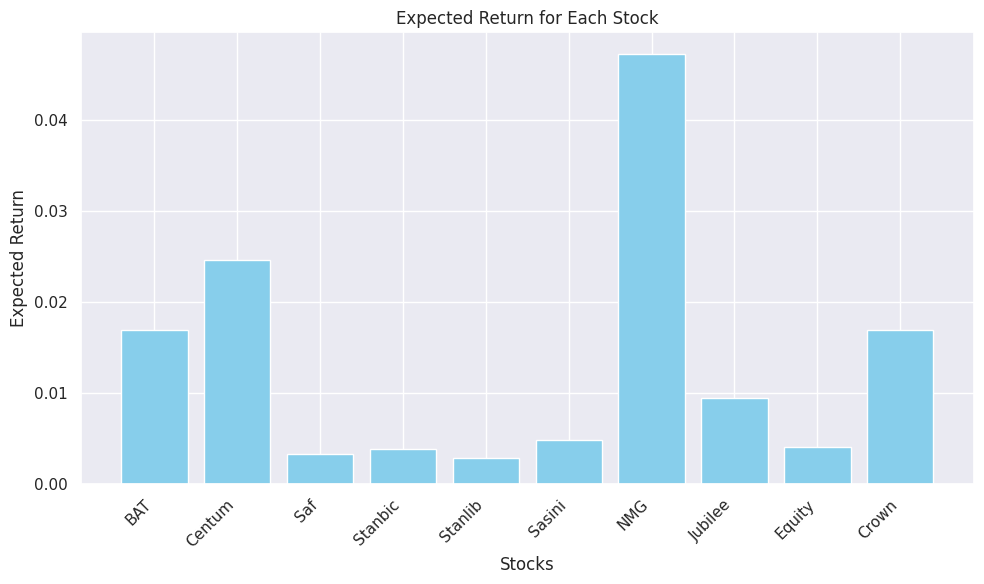

In [ ]:
import matplotlib.pyplot as plt

# Data
stocks = list(stock_expected_returns.keys())
expected_returns = list(stock_expected_returns.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(stocks, expected_returns, color='skyblue')
plt.xlabel('Stocks')
plt.ylabel('Expected Return')
plt.title('Expected Return for Each Stock')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
